In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bootstrap_ci(x, conf=0.95, resamples=10000):
    means = [np.mean(x[np.random.choice(x.shape[0], size=x.shape[0], replace=True), :], axis=0) for _ in range(resamples)]
    low = np.percentile(means, (1-conf)/2 * 100, axis=0)
    high = np.percentile(means, (1 - (1-conf)/2) * 100, axis=0)
    low = np.nan_to_num(low)
    high = np.nan_to_num(high)
    return low, high

In [3]:
dir = 'results\ContinuousCartPole_22_07_13-10_51_'+'/'
with open(dir+"content", "rb") as fp:
   content = pickle.load(fp)

with open(dir+"info", "rb") as fp:
   info = pickle.load(fp)


Ns = info['NS']
seeds = info['n_seeds']

In [4]:
seeds = 15

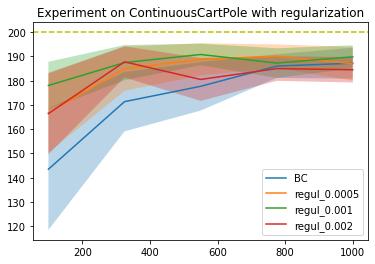

In [6]:

for c in content:
   mean_matrix = np.zeros((seeds, len(Ns)))
   for seed in range(seeds):
      subdir = dir+'seed'+str(seed)+'/'
      means = np.load(subdir+c+'_means.npy')
      mean_matrix[seed, :] = means
   low, high = bootstrap_ci(mean_matrix)
   if c == 'BC':
      plt.plot(Ns, (low+high)/2, label=c)
   else:
      plt.plot(Ns, (low+high)/2, label=c[1:])
   plt.fill_between(Ns, y1=low, y2=high, alpha=0.3)

plt.legend()
plt.axhline(y=200, color='y', linestyle='--')
plt.title('Experiment on '+ info['env'] +' with regularization')
plt.show()
        

In [14]:
import torch

name = 'results\BipedalWalker-v3_22_07_07-18_28_\seed0\_regul_0001_step_0.pt'
net = torch.load(name)
with torch.no_grad():
    for param in net.parameters():
        M = param.detach().numpy()
        print(M.shape)

(200, 24)
(200,)
(200, 200)
(200,)
(4, 200)
(4,)
